## Simple introudction :

* This dataset basically consists of explici and the factors affecting it.

* About Dataset:

  -->  *  Description for Spotify Songs Dataset on Kaggle

  -->> *  In this personal project I will build Recommendation system by using PCA  implement machine learning

  -->> * we can use RandomForest Regressor to predict which name of song to be most the popularity:
* This prooject consist from 2 parts :
  * part1 : DataAnalysis , Dataperpartion , DataExplantory , Data visualization
  * part2 : Build  Machine learning models   


## Features of datset :

* id: Unique identifier for the track on Spotify.

* name: Name of the track.

* genre: genre of the song.

* artists: Names of the artists who performed the track, separated by commas if there are multiple artists.

* album: Name of the album the track belongs to.

* popularity: Popularity score of the track (0-100, where higher is more popular).

* duration_ms: Duration of the track in milliseconds.

* explicit: Boolean indicating whether the track contains explicit content.



##                      ---->> *  if you find my Notebook useful Upvote me  * << ----

In [1]:
# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


## Analysis Dataset :

In [2]:
# load the data:
data=pd.read_csv("spotify_tracks.csv")
data.head(25)

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
5,742ZnC1OgUGIScdzXEy5ui,Acoustic,acoustic,Ling tosite sigure,#4,14,238146,False
6,3vpJdk93GzerZnlou6Ua0z,Beautiful Things - Acoustic,acoustic,Benson Boone,Daydream,0,201248,False
7,42qGA2116mkpSAaxzQfjEf,Landslide,acoustic,"Guus Dielissen, Andrew Gialanella",Landslide,29,199222,False
8,0OHHcoyrWnkVukc911UeZd,Acoustic,acoustic,Sonido de Agua en Bambu,Agua,15,129250,False
9,64zEnxASl3epPAIH4MsmSw,Acoustic Energy Vibrations,acoustic,"Healing Solfeggio Frequencies, Harmony Touch",528: Mind & Body Healing,45,118331,False


In [3]:
# get information about the data:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [4]:
#get the statistical:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,6300.0,30.754762,19.948991,0.0,16.0,29.0,45.0,90.0
duration_ms,6300.0,202847.735238,121029.858319,30060.0,147687.0,191607.0,236962.5,3601658.0


In [5]:
# check if there a null values: Not Found

data.isna().mean()

id             0.0
name           0.0
genre          0.0
artists        0.0
album          0.0
popularity     0.0
duration_ms    0.0
explicit       0.0
dtype: float64

## Data Explantory :

In [6]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    num_cols=data.select_dtypes("number").columns
    disc_cols=data.select_dtypes(include=("int64")).columns
    conts_cols=data.select_dtypes(include=("float64")).columns
    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['id', 'name', 'genre', 'artists', 'album'], dtype='object')
 Numerical_columns ----->>> Index(['popularity', 'duration_ms'], dtype='object') 
 Discrete_columns ---->>> Index(['popularity', 'duration_ms'], dtype='object') 
 Continous_cols ----->> Index([], dtype='object') 
 Nominal Columns --->> explicit    2
dtype: int64


In [7]:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)
    

All items in the ---->>>id column  :  
['7kr3xZk4yb3YSZ4VFtg2Qt' '1kJygfS4eoVziBBI93MSYp'
 '6lynns69p4zTCRxmmiSY1x' ... '56pHPaTeX2O9aVmTFYS8hV'
 '6Ldyc5TsR4kaUsuHKcB2AD' '3ry0f8ybk8upUBIk8unvmF']
**************************************************
All items in the ---->>>name column  :  
['Acoustic' 'Here Comes the Sun - Acoustic' 'Acoustic #3' ...
 'The Daintree' 'The Sorcerers Symphony' "Fiore d'inverno"]
**************************************************
All items in the ---->>>genre column  :  
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'bossanova' 'brazil' 'breakbeat'
 'british' 'cantopop' 'chicago-house' 'children' 'chill' 'classical'
 'club' 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm'
 'electro' 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage'
 'german' 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'h

In [8]:
# Here the column  id is useless for that i will drop it :
# cleaning the data :
data=data.drop(columns="id",axis=1)
data

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
...,...,...,...,...,...,...,...
6295,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False
6298,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False


## Visualization the Dataset 

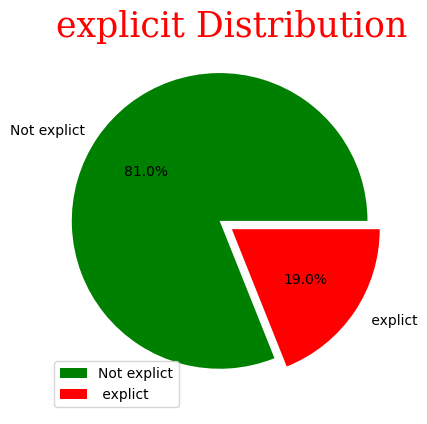

In [9]:
# observe the the explict distribution : 

f={"family":"serif","size":25,"color":"r"}
plt.title("explicit Distribution",fontdict=f)
explicit=data["explicit"].value_counts()
plt.pie(x=explicit,labels=["Not explict"," explict"],colors=["g","r"],explode=[0.1,0],autopct='%1.1f%%')
plt.legend()
plt.show()

In [10]:
for col in data.columns:
    print(data[col].value_counts())
    print("*"*50)

name
Kids                           26
Movies                         26
Chill                          23
Romance                        23
Road Trip                      23
                               ..
The Grave Awaits                1
Punishment                      1
We Hate Grindcore               1
The Protocols Of Anti-Sound     1
Fiore d'inverno                 1
Name: count, Length: 4518, dtype: int64
**************************************************
genre
acoustic             50
new-age              50
punk                 50
psych-rock           50
progressive-house    50
                     ..
french               50
forro                50
folk                 50
emo                  50
world-music          50
Name: count, Length: 126, dtype: int64
**************************************************
artists
Metallica                     22
ONE OK ROCK                   20
Chicago House Selection       18
Death                         17
Progressive House Sessions    

/tmp/ipykernel_6059/2897507382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_popularity.index,y=top_10_popularity.values,color="r",label="popularity",palette='coolwarm')


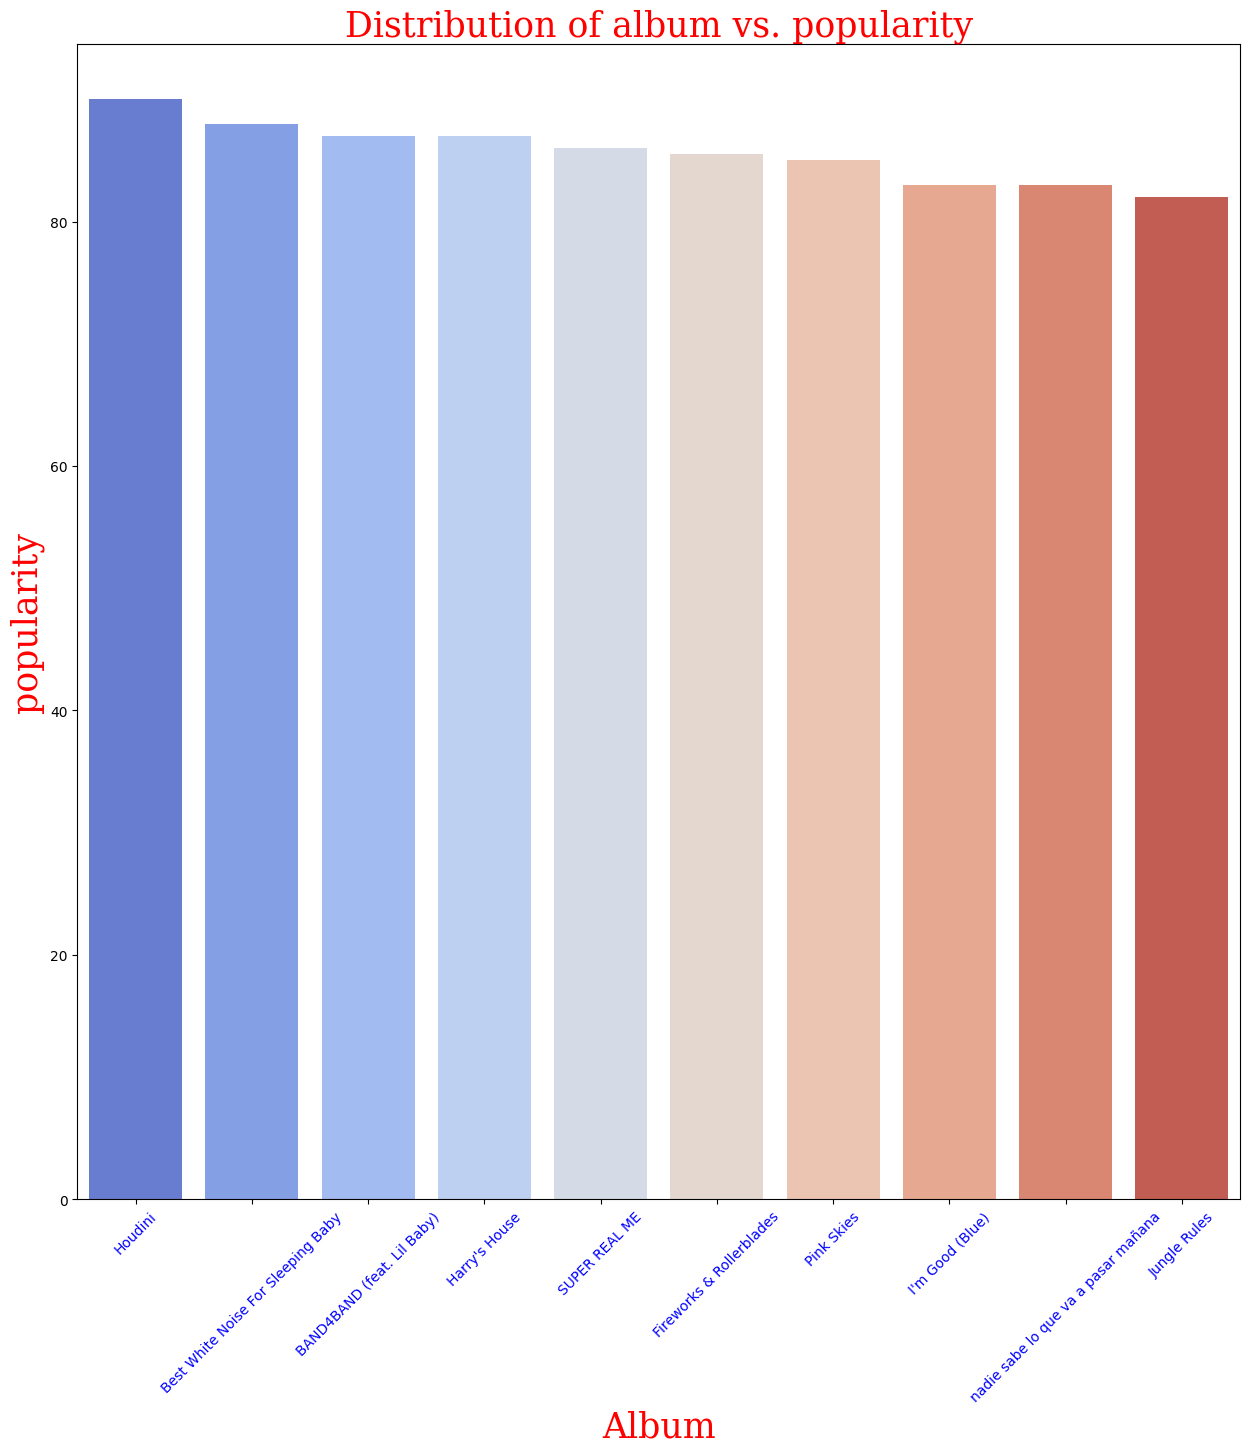

In [11]:
# oserve the album vs. popularity:
plt.figure(figsize=(15,15))
plt.title("Distribution of album vs. popularity",fontdict=f)
top_10_popularity=data.groupby("album")["popularity"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_10_popularity.index,y=top_10_popularity.values,color="r",label="popularity",palette='coolwarm')
plt.xticks(rotation=45,color="b")
plt.xlabel("Album",fontdict=f)
plt.ylabel("popularity",fontdict=f)
plt.show()

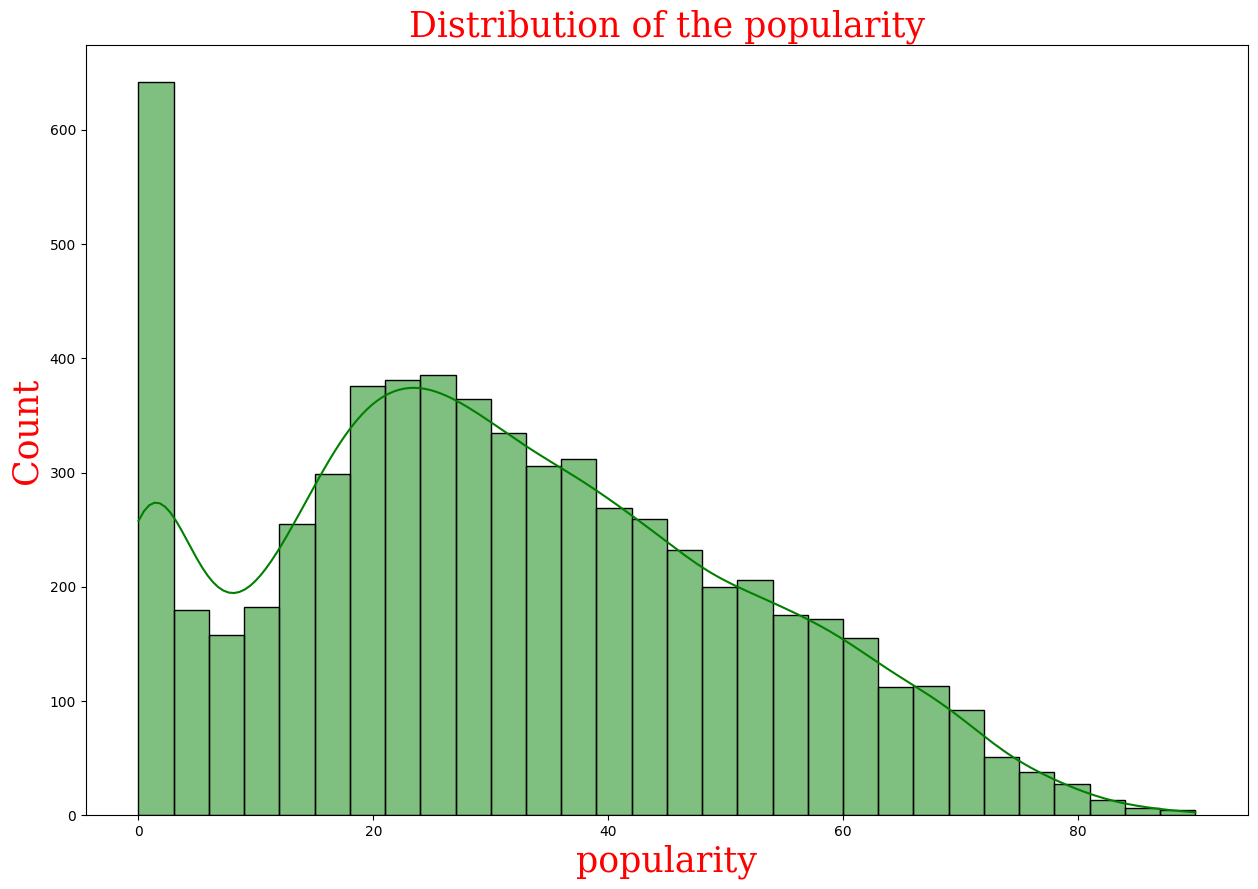

In [12]:
#observe the popularity distribution:
plt.figure(figsize=(15,10))
plt.title("Distribution of the popularity",fontdict=f)
plt.xlabel("popularity",fontdict=f)
plt.ylabel("Count",fontdict=f)
sns.histplot(data["popularity"],color="g",bins=30,kde=True,label="popularity")
plt.show()

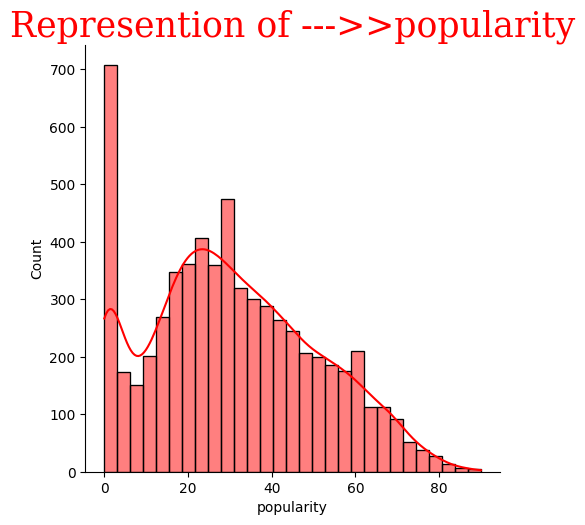

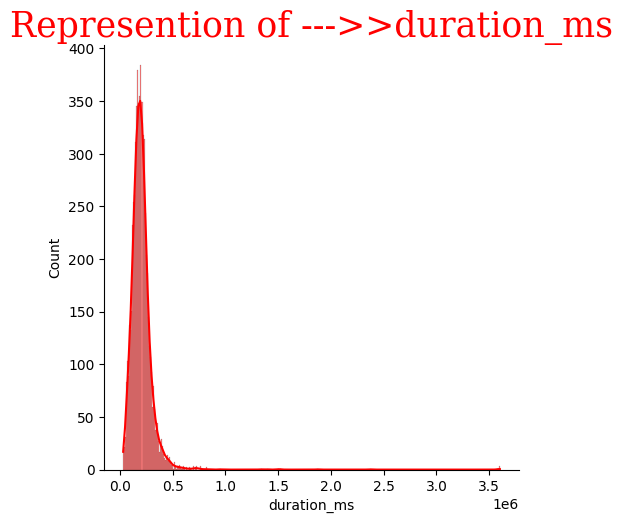

In [13]:
for col in data.select_dtypes(include="int64").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    plt.title("Represention of --->>"+col,fontdict=f)

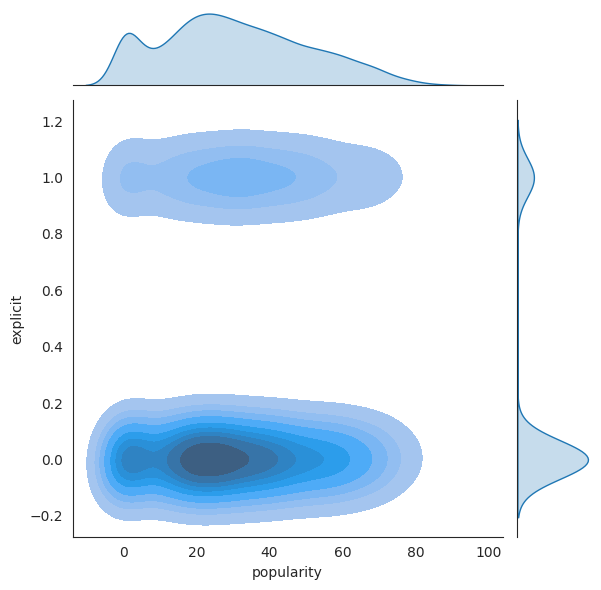

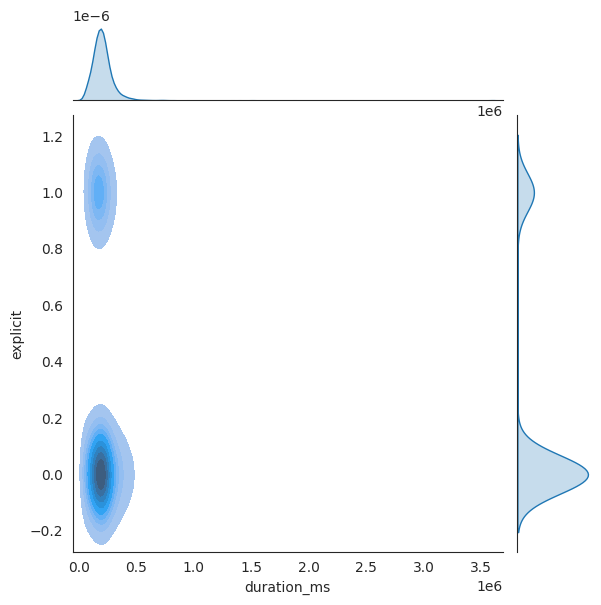

In [14]:
for col in data.select_dtypes("number"):
    if col !="explicit":
       with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["explicit"],kind="kde",fill=True)

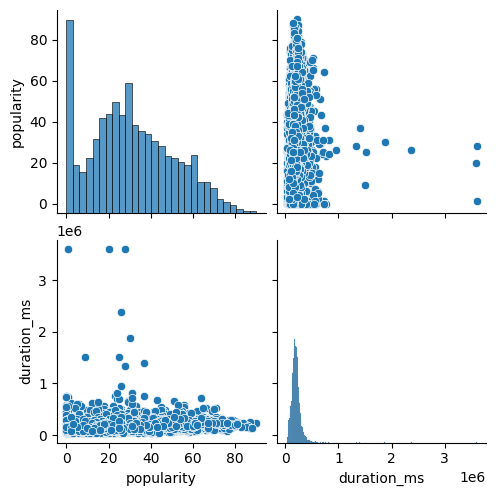

In [15]:
# observe for the integear_data
sns.pairplot(data.select_dtypes(include="int64"))

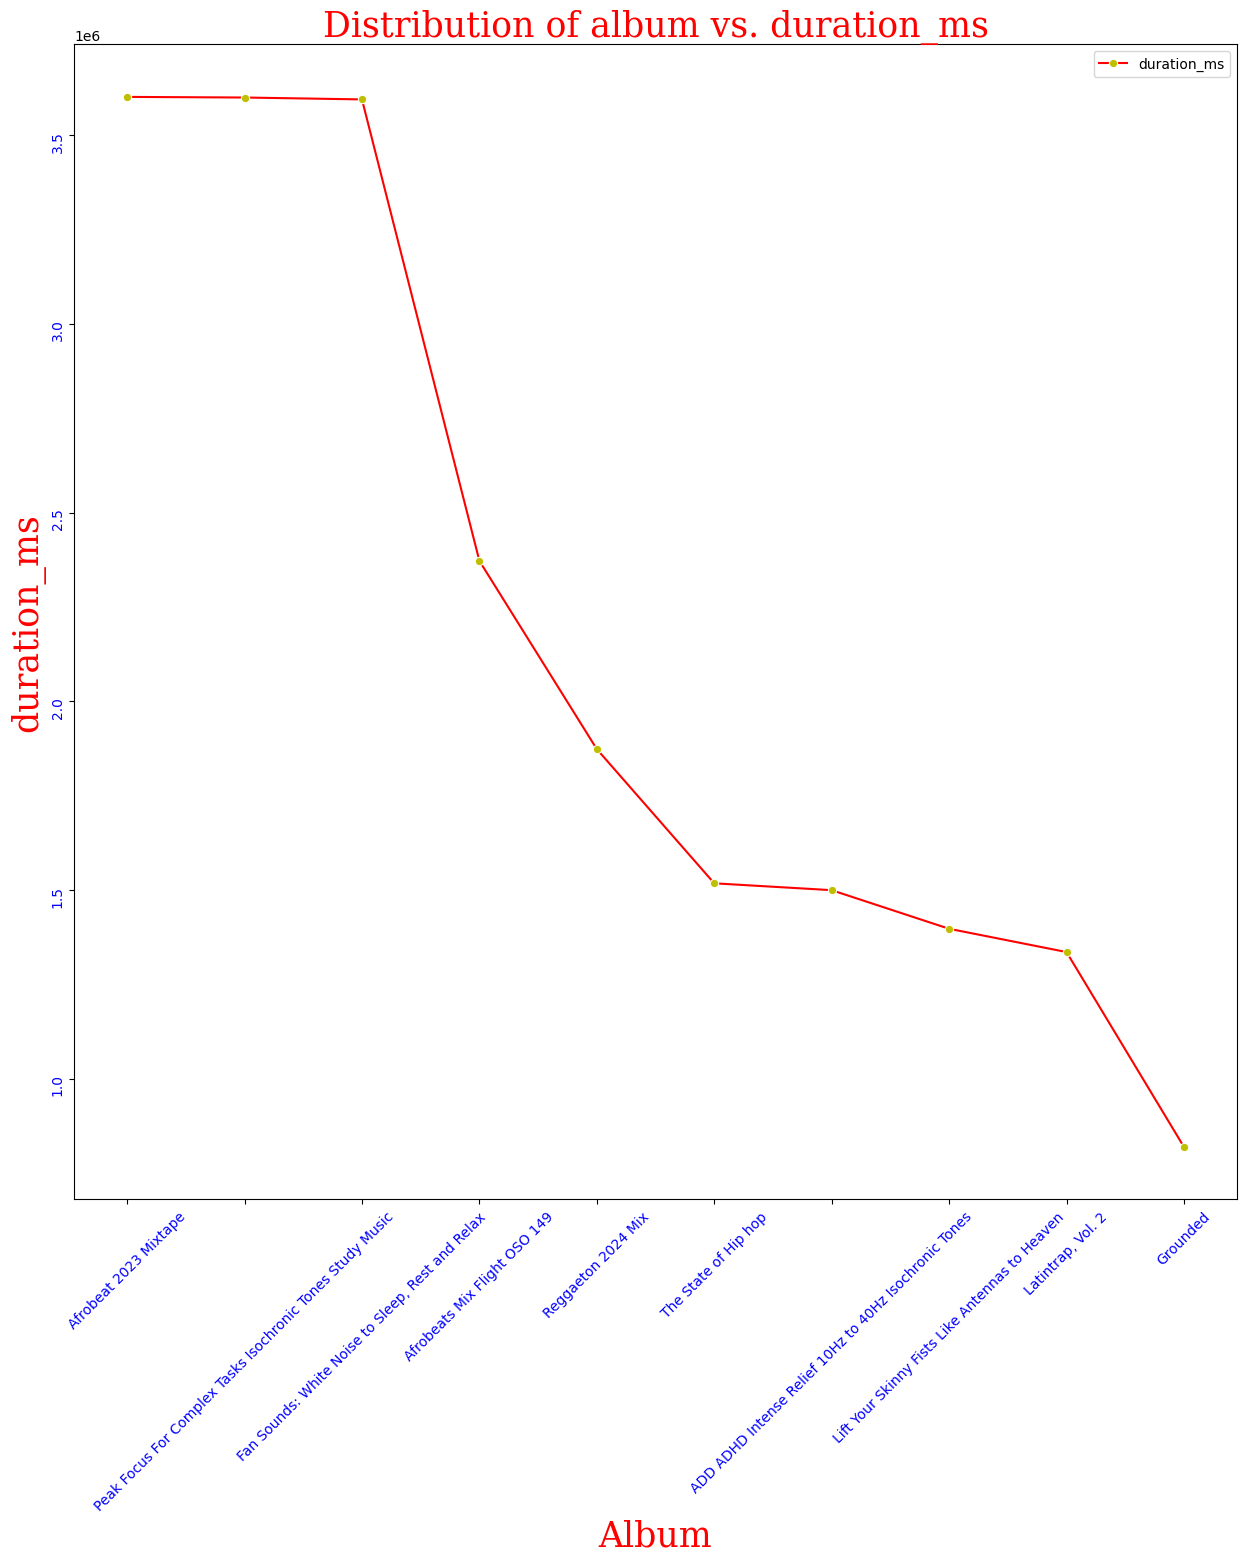

In [16]:
# oserve the album vs. duration_ms:
plt.figure(figsize=(15,15))
plt.title("Distribution of album vs. duration_ms",fontdict=f)
top_10_popularity=data.groupby("album")["duration_ms"].mean().sort_values(ascending=False).head(10)
sns.lineplot(x=top_10_popularity.index,y=top_10_popularity.values,color="r",label="duration_ms",marker="o",mfc="y")
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=90,color="b")
plt.xlabel("Album",fontdict=f)
plt.ylabel("duration_ms",fontdict=f)
plt.legend()
plt.show()

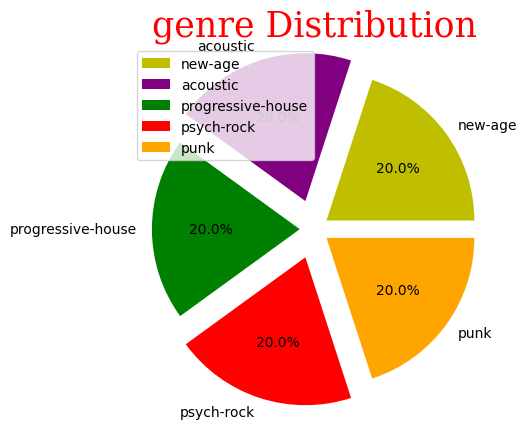

In [17]:
# observe the the genre distribution : 
#new-age,acoustic,progressive-house,psych-rock,punk 

f={"family":"serif","size":25,"color":"r"}
plt.title("genre Distribution",fontdict=f)
genre=data["genre"].value_counts().head(5)
plt.pie(x=genre,colors=["y","purple","g","r","orange"],labels=["new-age","acoustic","progressive-house","psych-rock","punk"],explode=[0.1,0.2,0.1,0.2,0.1],autopct='%1.1f%%')
plt.legend()
plt.show()



array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>]], dtype=object)

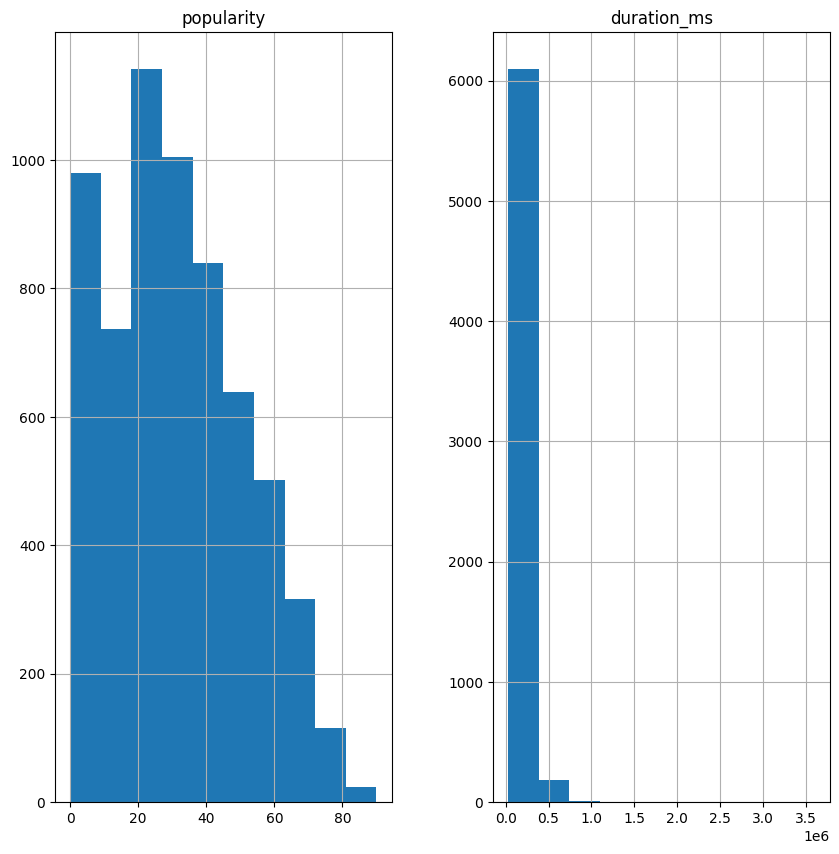

In [18]:
data.hist(figsize=(10,10))

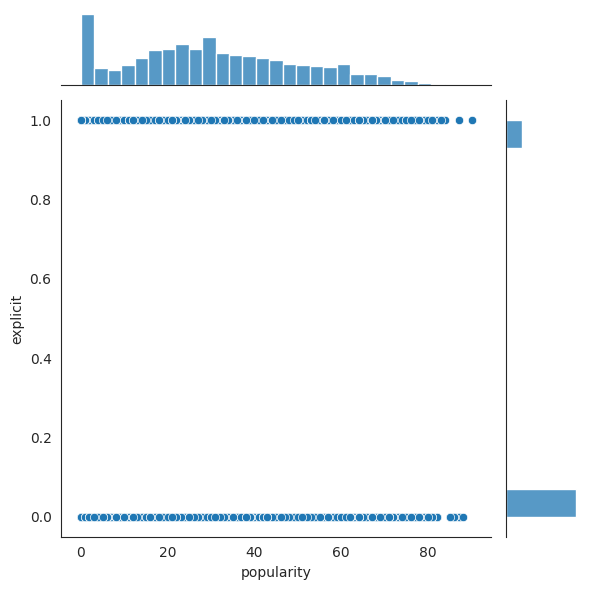

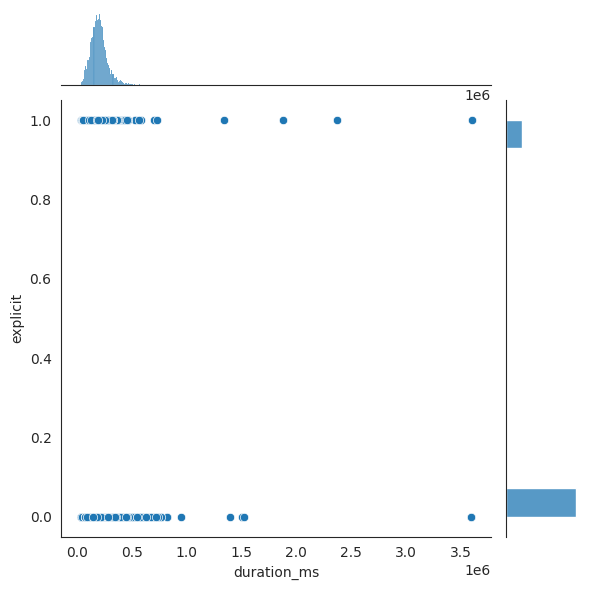

In [19]:
for col in data.select_dtypes("number"):
    if col !="explicit":
       with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["explicit"],kind="scatter")

## Extract some statistical & the most important properties from the dataset:

In [18]:
# Calculate the correlation :
correlation=data.select_dtypes("number").corr()
correlation

,popularity,duration_ms
popularity,1.000000,0.023051
duration_ms,0.023051,1.000000


In [19]:
spearman=data.select_dtypes("number").corr(method="spearman")
spearman

,popularity,duration_ms
popularity,1.000000,0.098908
duration_ms,0.098908,1.000000


In [20]:
pearson=data.select_dtypes("number").corr(method="pearson")
pearson

,popularity,duration_ms
popularity,1.000000,0.023051
duration_ms,0.023051,1.000000


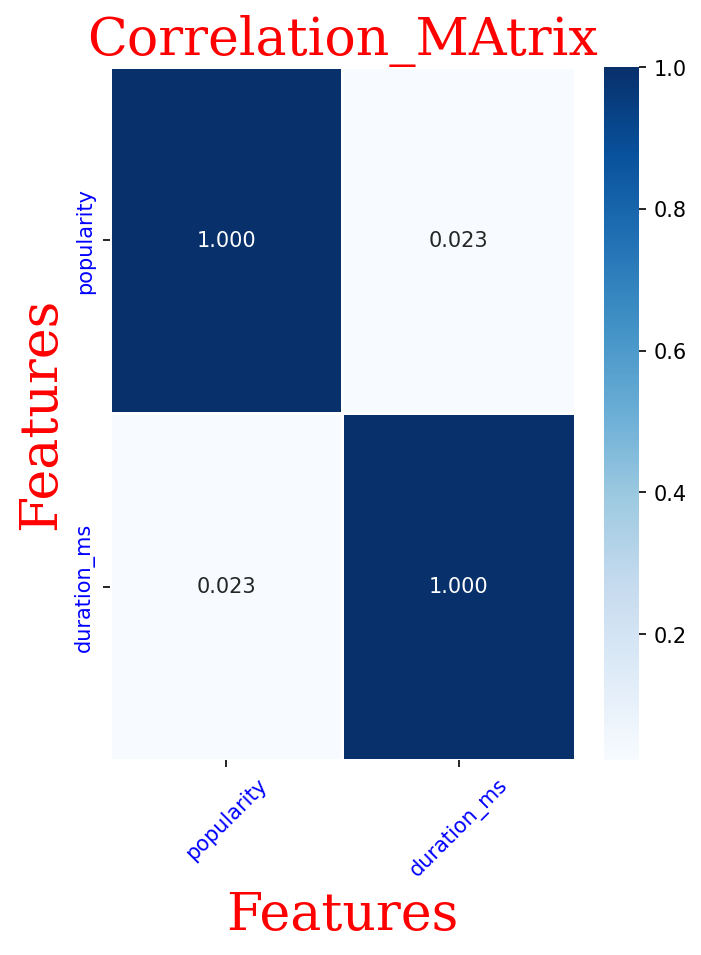

In [21]:
# Make Heatmap Correlation_matrix for all dataset:
plt.figure(figsize=(5,6),dpi=150)
plt.title("Correlation_MAtrix",fontdict=f)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.3f",cmap='Blues',linewidths=0.5)
plt.xlabel("Features",fontdict=f)
plt.ylabel("Features",fontdict=f)
plt.xticks(rotation=45,color="b")
plt.yticks(color="b",rotation=90)
plt.show()

In [22]:
# Extract the most important Numerical Features:
from sklearn.feature_selection import SelectKBest
fs=SelectKBest(score_func=f_classif,k=2)
fs.fit(data.drop(columns="explicit").select_dtypes("number").fillna(0),data["explicit"])



SelectKBest(k=2)

In [23]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="explicit").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,2.017072e-08,31.559361,popularity
1,1.842181e-04,14.002232,duration_ms


In [24]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=2)
mic.fit(data.drop(columns="explicit").select_dtypes("number").fillna(0),data["explicit"])



SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7f88637dbf70>)

In [25]:
features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="explicit").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

popularity     0.001728
duration_ms    0.020001
dtype: float64

## preparing the dataset & Bulding the models of Machinelearning

In [26]:
# Convert All Categorical data into Numerical data:

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
    

In [27]:
# split the dataset:

x=data.drop(columns="explicit",axis=1)
y=data["explicit"]

print(f"the shape of x,y ------>>> {np.shape(x),np.shape(y)}")

the shape of x,y ------>>> ((6300, 6), (6300,))


In [28]:
# train the model:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(y_test))



(4410, 6) (1890, 6)
(4410,) (1890,)


In [29]:
# Build the model RandomForestRegressor :
Rc=RandomForestRegressor(n_estimators=1,random_state=42)
Rc.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1, random_state=42)

In [30]:
Rc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [31]:
#predict the model:

y_predict=Rc.predict(x_test)
y_predict[:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [32]:
# Evalute the accuracy:
print(f"model_score --->>>{Rc.score(x_test,y_test)*100:0.2f}%")
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}')


model_score --->>>-79.01%
Mean Squared Error: 0.2841269841269841


In [33]:
# Hypothesis  & Confusion_matrix :
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)




True positve prediction : 101
True Negative predicion : 1252
False positve prediction: 273
False Negative prediction: 264


Explained variance ratio: [0.37728072 0.32121625]


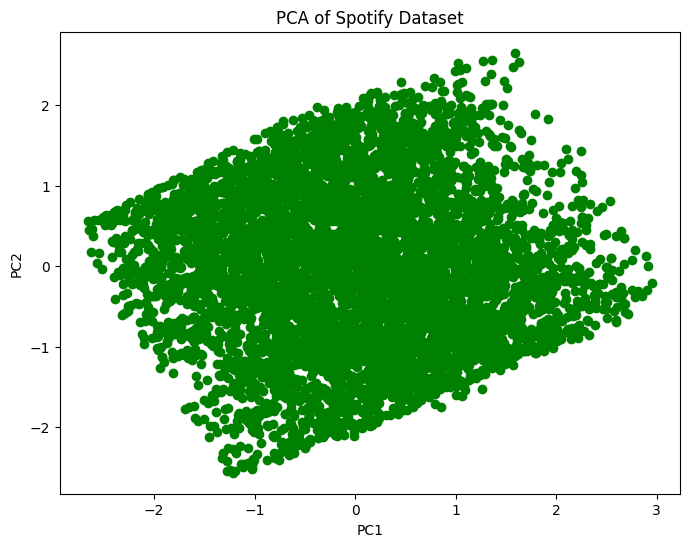

In [34]:
# Build PCA Models:
# Select numerical features for PCA
features = ['name',  'popularity', 'duration_ms']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])            

# Create a PCA model
pca = PCA(n_components=2)  # You can choose the number of components

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Create a DataFrame for the PCA components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'],color="g")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Spotify Dataset')
plt.show()

In [36]:
print(""" 

--->>> Here is the End of the project 
--->>> Devloper: AbdalRahman Gamell Hebishy


""")

 

--->>> Here is the End of the project 
--->>> Devloper: AbdalRahman Gamell Hebishy



